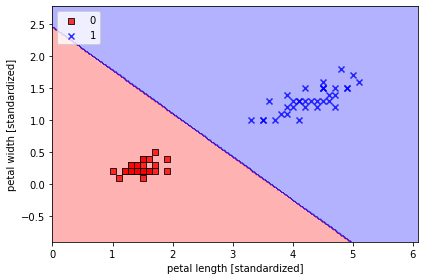

In [1]:
# 연산 모듈
import numpy as np
# 그래프
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# 사이킷 런 
from sklearn import datasets
# 데이터 계층화
from sklearn.model_selection import train_test_split
# 데이터 표준화
from sklearn.preprocessing import StandardScaler

class LogisticRegressionGD(object) : 
    """
    경사 하강법을 사용한 로지스틱 회귀 분류기
    
    매개변수
    ----------------
    eta : float
        학습률 (0.0 ~ 1.0)
    n_iter : int
        훈련 데이터셋 반복 횟수
    random_state : int
        가중치 무작위 초기화를 위한 난수 생성기 시드
        
    속성
    ----------------
    w_ : 1d-array
        학습된 가중치
    cost_ : list
        에포크마다 누적된 로지스틱 비용 함수 값
    """
    def __init__(self, eta = 0.05, n_iter = 100, random_state = 1) :
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y) :
        """
        훈련 데이터 학습
        
        매개변수
        -------------
        X : {array-like}, shape = [n_samples, n_features]
            n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
            타깃 값
        
        반환값
        -------------
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter) :
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            # 오차 제곱합 대신 로지스틱 비용을 계산
            cost = (-y.dot(np.log(output)) - ((1-y).dot(np.log(1 - output))))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X) :
        """
        최종 입력 계산
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, z) :
        """
        로지스틱 시그모이드 활성화 계산
        """
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X) :
        """
        단위 계단 함수를 사용하여 클래스 레이블을 반환
        """
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # return where(self.activation(self.net_input(X)) > 0.5, 1, 0)
        
        
# 2차원 데이터셋의 결정 경계를 시각화
def plot_decision_regions(X, y, classifier, resolution = 0.02) :
    
    # 마커와 컬러맵 설정
    markers = ('s', 'x', 'o', '^', ' v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 결정 경계 그리기
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 샘플의 산점도
    for idx, cl in enumerate(np.unique(y)) :
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha = 0.8, c = colors[idx], marker = markers[idx],
                   label = cl, edgecolor = 'black')
        

# 데이터 가져오기
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

# 데이터 셋을 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

# 데이터 스케일 표준화
sc = StandardScaler() # 특성 스케일 표준화를 위해 불러옴
sc.fit(X_train) # 각 특성 차원마다 샘플 평균과 표준 편차를 계산
X_train_std = sc.transform(X_train) # transform을 통하여 계산된 값으로 표준화
X_test_std = sc.transform(X_test)
        
# 작동 확인
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta = 0.05, n_iter = 1000, random_state = 1)
lrgd.fit(X_train_01_subset, y_train_01_subset)
plot_decision_regions(X = X_train_01_subset, y = y_train_01_subset, classifier = lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()